In [2]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
f1_1 = np.load('data/F1s_onefeature.npy')
f1_2 = np.load('data/F1s_twofeature_v_vertical.npy') ### vertical velocity
f1_22 = np.load('data/F1s_twofeature_v_horizontal.npy')  
f1_3 = np.load('data/F1s_threefeature.npy')

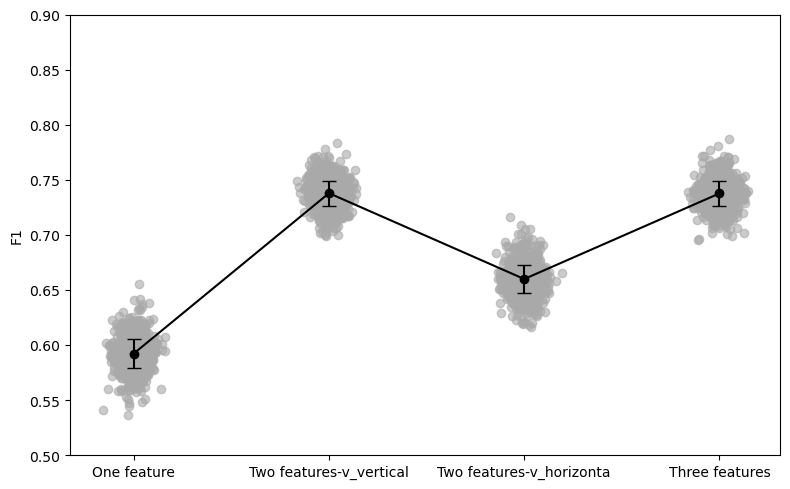

In [4]:

# Combine into one array
data = [f1_1, f1_2, f1_22, f1_3]
labels = ['One feature', 'Two features-v_vertical', 'Two features-v_horizonta', 'Three features']

# Scatter plot
plt.figure(figsize=(8, 5))

for i, ll in enumerate(data):
    x = np.random.normal(i , 0.05, size=len(ll))  # jitter for visibility
    plt.scatter(x, ll, alpha=0.6, label=labels[i], c='darkgray')

data = np.array(data)
data = np.transpose(data)
mean_bic = np.mean(data, axis=0)
std = np.std(data, axis=0, ddof=1)
states = np.arange(0, 0 + len(mean_bic))
plt.errorbar(states, mean_bic, yerr=std, fmt='-o', color='black', capsize=5)

# Customize axes
plt.xticks([0, 1, 2, 3], labels)
plt.ylabel('F1')
plt.ylim([0.5, 0.9])

plt.tight_layout()
plt.show()


In [5]:

from scipy.stats import kruskal

stat, p = kruskal(f1_1, f1_2, f1_22, f1_3
                  )
print("Kruskal–Wallis p-value:", p)

from scipy.stats import mannwhitneyu

stat, p_ab = mannwhitneyu(f1_1, f1_2, alternative='two-sided')
print(p_ab)

Kruskal–Wallis p-value: 0.0
0.0


In [6]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
f1_50 = np.load('data/F1s_50ms.npy')
f1_100 = np.load('data/F1s_100ms.npy') ### vertical velocity
f1_250 = np.load('data/F1s_250ms.npy')  
f1_500 = np.load('data/F1s_500ms.npy')

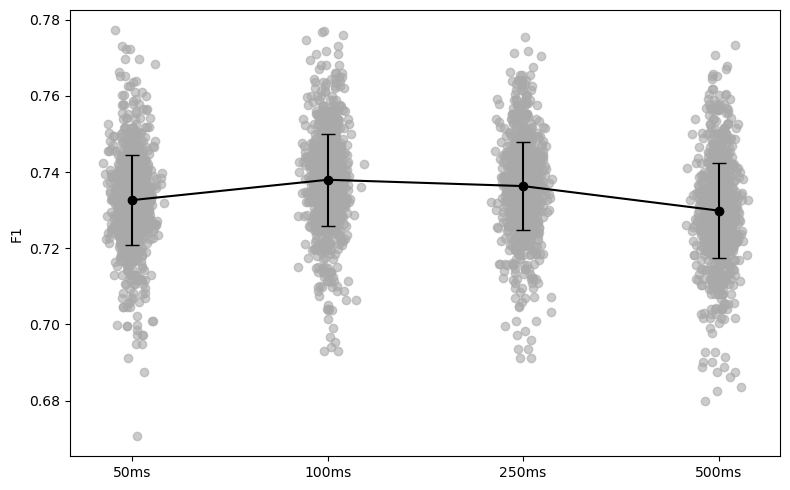

In [10]:
data = [f1_50, f1_100, f1_250, f1_500]
labels = ['50ms', '100ms', '250ms', '500ms']

# Scatter plot
plt.figure(figsize=(8, 5))

for i, ll in enumerate(data):
    x = np.random.normal(i , 0.05, size=len(ll))  # jitter for visibility
    plt.scatter(x, ll, alpha=0.6, label=labels[i], c='darkgray')

data = np.array(data)
data = np.transpose(data)
mean_bic = np.mean(data, axis=0)
std = np.std(data, axis=0, ddof=1)
states = np.arange(0, 0 + len(mean_bic))
plt.errorbar(states, mean_bic, yerr=std, fmt='-o', color='black', capsize=5)

# Customize axes
plt.xticks([0, 1, 2, 3], labels)
plt.ylabel('F1')


plt.tight_layout()
plt.show()


In [11]:

from scipy.stats import kruskal

stat, p = kruskal(f1_50, f1_100, f1_250, f1_500
                  )
print("Kruskal–Wallis p-value:", p)

from scipy.stats import mannwhitneyu

stat, p_ab = mannwhitneyu(f1_50, f1_100, alternative='two-sided')
print(p_ab)

Kruskal–Wallis p-value: 1.9894278608593985e-68
1.6448481614669227e-27


5


B:\TMP\ipykernel_16832\339795289.py:70: RuntimeWarning: divide by zero encountered in divide
  r = (1 / r) ** 2
B:\TMP\ipykernel_16832\339795289.py:71: RuntimeWarning: invalid value encountered in divide
  r = r / np.max(r)


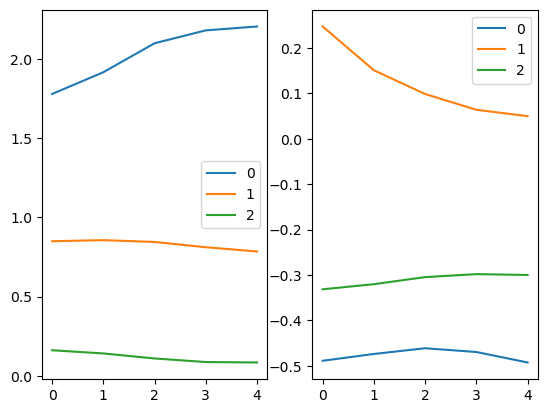

In [13]:
import glob

from sklearn import linear_model
from scipy.signal import hilbert
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
#stimulus_window = 70  #stimulus length for STA (stimulus trigger ensembles average)
roll_time = 5  #rolling time for probility estimation of the outcome
states_label=[0,1,2]
v_smooth_window=2
lp_f = 25
accuracy_list=[]
accuracy_list2=[]
accuracy_list4=[]
states_linear_output=[]
states_linear_output2=[]
states_linear_output4=[]
fig, axs = plt.subplots(1,2)
sta_all=[]
sta_vx_all=[]
shuffled_indicies = np.random.permutation(42991+5*16)
train_data_size = int((42991+5*16)* 3 / 4)
for stimulus_window in range(5,6,2):
    print(stimulus_window)
    prob_states_mul_lr=[]
    prob_states_lr = []
    prob_states_lr_2=[]
    prob_states_lr_4 = []
    v_x_all =[]
    v_y_all=[]
    for states in states_label:
        #initial_time = [569, 276, 99,184,1776,567,2435,226,1017]
        initial_time = [569, 276, 99,1776,  567, 2435,  141, 109, 204, 400, 377, 206, 170,177, 207, 169]

        videodirectory = 'B:/HsinYi/GitHub/sensory_beh/'
        videoname = '*'
        sensory_dic = videodirectory+'sensory_auto/'
        sensory_roi_files = glob.glob(sensory_dic+ videoname+ '_roi_coordinates_side.npz')
        sensory_stft_files = glob.glob(sensory_dic+ videoname+ '_roi_stft_side.npz')

        labeled_beh = []
        observations = []
        stimulus =[]
        stimulus_all=[]
        stimulus_fly=[]
        stimulus_v_x = []
        stimulus_v_y = []
        stimulus_fly_all=[]
        stimulus_v_x_all = []
        stimulus_v_y_all = []
        observations_fly = []
        for j in range(len(sensory_roi_files)):
            sensory_roi = np.load(sensory_roi_files[j])
            sensory_stft = np.load(sensory_stft_files[j])

            roi_fly_list = sensory_roi['roi_fly_list']
            roi_spider_list = sensory_roi['roi_spider_list']
            nframes = roi_fly_list.shape[0]
            ff_stft = sensory_stft['ff']
            f_spec_fly = sensory_stft['f_spec_fly']
            f_spec_fly_p = sensory_stft['f_spec_fly_p']
            f_spec_spider_p = sensory_stft['f_spec_spider_p']
            vid_name = sensory_roi_files[j].split('/sensory_auto\\')[1].split('_roi_coordinates_side.npz')[0]
            r = roi_spider_list[:, 1] + roi_spider_list[:, 3] / 2 - roi_fly_list[:, 1] - roi_fly_list[:, 3] / 2
            r = np.abs(r)
            r = r / ((roi_spider_list[:, 2]+roi_spider_list[:, 3]))/2
            #r = r / np.min(r)
            r = (1 / r) ** 2
            r = r / np.max(r)
            r[np.where(r<0.5)[0]]=0.5
            # r=r+0.5
            # r=r/np.max(r)
            x = roi_fly_list[:, 0] + roi_fly_list[:, 2] / 2
            v_x = x - np.roll(x, 1)
            v_x = v_x[1:len(v_x)]
            y = roi_fly_list[:, 1] + roi_fly_list[:, 3] / 2
            v_y = y - np.roll(y, 1)
            v_y = v_y[1:len(v_y)]
            v_x = hilbert(v_x)
            v_x = np.abs(v_x)
            v_y = hilbert(v_y)
            v_y = np.abs(v_y)

            ## Load beh
            # filenames = glob.glob(videodirectory+ 'wavelet/'+vid_name+ '*_croprotaligned01234_nonormalized_wavelet.npz')
            # csv_filenames = glob.glob(videodirectory+'merging_static/' + vid_name + '*_wavelet_timestep.csv')
            beh_hmm = np.load(
                glob.glob(videodirectory + 'sensory_auto/' + vid_name + '*_hmm_umap_filtered_predictedlabels.npy')[0]
                )

            ## Sensory
            test_divide = np.divide(f_spec_fly, f_spec_fly_p)
            # test_divide = np.mean(test_divide, axis=0)
            t = [i for i in range(int(40 / 2), (nframes - int(40 / 2)), 2)]
            # t= [i for i in range(4000, 6000, 10)]
            # if '0328' in sensory_roi_files[j]:
            #     t.append(5100)
            t = np.array(t)

            t3 = [i for i in range(0, initial_time[j], 1)]
            t3 = np.array(t3)
            yinterp3 = np.interp(t3, t, np.mean(test_divide[0:13, ], axis=0))
            yinterp3_mean = np.mean(yinterp3)
            yinterp3_std = np.std(yinterp3)
            yinterp3fly = np.interp(t3, t, np.mean(f_spec_fly[0:13, ], axis=0))
            yinterp3fly_mean = np.mean(yinterp3fly)
            yinterp3fly_std = np.std(yinterp3fly)
            yinterp3spider = np.interp(t3, t, np.mean(f_spec_spider_p[0:13, ], axis=0))
            yinterp3spider_mean = np.mean(yinterp3spider)
            yinterp3spider_std = np.std(yinterp3spider)

            t2 = [i for i in range(initial_time[j], (len(beh_hmm) + initial_time[j]), 1)]
            # # t= [i for i in range(4000, 6000, 10)]
            t2 = np.array(t2)
            #
            yinterp = np.interp(t2, t, np.mean(test_divide[0:13, ], axis=0))
            yinterp = (yinterp - yinterp3_mean) / yinterp3_std
            yinterpspider = np.interp(t2, t, np.mean(f_spec_spider_p[0:13, ], axis=0))
            #yinterpspider = (yinterpspider - yinterp3spider_mean) / yinterp3spider_std
            yinterpspider = yinterpspider / (np.max(yinterpspider))
            # yinterp = yinterp/(np.max(yinterp))
            # yinterp = interp1d(t,  test_divide, axis=1)
            # yinterp = yinterp(t2)
            yinterpfly = np.interp(t2, t, np.mean(f_spec_fly[0:13, :], axis=0))
            yinterpfly = (yinterpfly - yinterp3fly_mean) / yinterp3fly_std
            #yinterpfly = yinterpfly / (np.max(yinterpfly))
            #yinterpfly = yinterpfly - yinterpspider * r[t2]
            #yinterpfly = yinterpfly / np.max(yinterpfly)
            # if states ==0:
            #
            #     v_x_all.append(v_x[t2][0:len(v_x[t2])-stimulus_window])
            #     v_y_all.append(v_y[t2][0:len(v_y[t2])-stimulus_window])
            v_x_sensory = v_x[t2][0:len(v_x[t2])]
            v_y_sensory = v_y[t2][0:len(v_y[t2])]

            sos = signal.butter(10, lp_f, 'lp', fs=100, output='sos')
            v_x_sensory = signal.sosfilt(sos, v_x_sensory)
            v_y_sensory = signal.sosfilt(sos, v_y_sensory)

            v_x_sensory = (v_x_sensory  -np.mean(v_x_sensory )) / np.std(v_x_sensory)
            v_y_sensory = (v_y_sensory  -np.mean(v_y_sensory )) / np.std(v_y_sensory)

            # for v_time in range(len(v_x_sensory)):
            #     if v_time < int(v_smooth_window / 2):
            #         v_x_sensory[v_time] = np.max(v_x_sensory[0: int(v_smooth_window)])
            #         v_y_sensory[v_time] = np.max(v_y_sensory[0: int(v_smooth_window)])
            #     else:
            #         v_x_sensory[v_time] = np.max(
            #             v_x_sensory[v_time - int(v_smooth_window / 2): v_time + int(v_smooth_window / 2)])
            #         v_y_sensory[v_time] = np.max(
            #             v_y_sensory[v_time - int(v_smooth_window / 2): v_time + int(v_smooth_window / 2)])

            ## Spike trigger average
            from itertools import groupby
            count_dups = [sum(1 for _ in group) for _, group in groupby(beh_hmm)]
            cumsum = np.cumsum(count_dups)

            groups = []
            uniquekeys = []
            for k, g in groupby(beh_hmm):
                groups.append(list(g))  # Store group iterator as a list
                uniquekeys.append(k)

            idx = np.where(np.array(uniquekeys)==states)
            stimulus_temp=[]
            stimulus_temp_fly=[]

            stimulus_v_x_temp = []
            stimulus_v_y_temp = []

            for trigger in range(len(idx[0])):
                if idx[0][trigger]==0:
                    continue
                else:
                    event_time = cumsum[idx[0][trigger]-1]
                    if len(yinterp[event_time - stimulus_window:event_time])==0:
                        stimulus.append(yinterp[0:stimulus_window])
                        stimulus_fly.append(yinterpfly[0:stimulus_window])
                        stimulus_temp.append(yinterp[0:stimulus_window])
                        stimulus_temp_fly.append(yinterpfly[0:stimulus_window])
                        stimulus_v_x.append(v_x_sensory[0:stimulus_window])
                        stimulus_v_y.append(v_y_sensory[0:stimulus_window])
                        stimulus_v_x_temp.append(v_x_sensory[0:stimulus_window])
                        stimulus_v_y_temp.append(v_y_sensory[0:stimulus_window])
                    else:
                        stimulus.append(yinterp[event_time - stimulus_window:event_time])
                        stimulus_fly.append(yinterpfly[event_time - stimulus_window:event_time])
                        stimulus_temp.append(yinterp[event_time - stimulus_window:event_time])
                        stimulus_temp_fly.append(yinterpfly[event_time - stimulus_window:event_time])
                        stimulus_v_x.append(v_x_sensory[event_time - stimulus_window:event_time])
                        stimulus_v_y.append(v_y_sensory[event_time - stimulus_window:event_time])
                        stimulus_v_x_temp.append(v_x_sensory[event_time - stimulus_window:event_time])
                        stimulus_v_y_temp.append(v_y_sensory[event_time - stimulus_window:event_time])


            stimulus_all.append(stimulus_temp)
            stimulus_fly_all.append(stimulus_temp_fly)
            stimulus_v_x_all.append(stimulus_v_x_temp)
            stimulus_v_y_all.append(stimulus_v_y_temp)


            #beh_hmm= np.load(filenames[0].replace('.npz', '_hmm_umap_filtered_predictedlabels.npy'))
            #beh_manual= np.load(filenames[0].replace('.npz', '_manuallabels.npy'))




            labeled_beh.append(beh_hmm)
            observations.append(list(yinterp))
            observations_fly.append(list(yinterpfly))


        ## Spike trigger average of all videos. Mean centered
        stimulus_test = np.array(stimulus)
        data_ensembles_len = stimulus_test.shape[0]
        arr = np.arange(data_ensembles_len)
        np.random.shuffle(arr)
        #train_set = stimulus_test[arr[0:int(len(arr)*3/4)]]
        #test_set = stimulus_test[arr[int(len(arr)*3/4):len(arr)]]
        train_set = stimulus_test
        sta = np.mean(train_set, axis=0)
        #sta = sta-np.mean(sta)



        stimulus_test = np.array(stimulus_fly)
        data_ensembles_len = stimulus_test.shape[0]
        arr = np.arange(data_ensembles_len)
        np.random.shuffle(arr)
        # train_set = stimulus_test[arr[0:int(len(arr)*3/4)]]
        # test_set = stimulus_test[arr[int(len(arr)*3/4):len(arr)]]
        train_set = stimulus_test
        sta_fly = np.mean(train_set, axis=0)
        #sta_fly = sta_fly-np.mean(sta_fly)

        stimulus_test = np.array(stimulus_v_x)
        data_ensembles_len = stimulus_test.shape[0]
        arr = np.arange(data_ensembles_len)
        np.random.shuffle(arr)
        # train_set = stimulus_test[arr[0:int(len(arr)*3/4)]]
        # test_set = stimulus_test[arr[int(len(arr)*3/4):len(arr)]]
        train_set = stimulus_test
        sta_vx = np.mean(train_set, axis=0)

        stimulus_test = np.array(stimulus_v_y)
        data_ensembles_len = stimulus_test.shape[0]
        arr = np.arange(data_ensembles_len)
        np.random.shuffle(arr)
        # train_set = stimulus_test[arr[0:int(len(arr)*3/4)]]
        # test_set = stimulus_test[arr[int(len(arr)*3/4):len(arr)]]
        train_set = stimulus_test
        sta_vy = np.mean(train_set, axis=0)

        axs[0].plot(sta, label=str(states))
        sta_all.append(sta)
        axs[0].legend()
        # axs[1].plot(sta_fly, label='sta_fly'+str(states))
        # axs[1].legend()
        axs[1].plot(sta_vx, label=str(states))
        sta_vx_all.append(sta_vx)
        axs[1].legend()
        # axs[3].plot(sta_vy, label=str(states))
        # axs[3].legend()

### Static: 0
### Crouching: 1
### Shaking: 2



10


B:\TMP\ipykernel_16832\3508175077.py:70: RuntimeWarning: divide by zero encountered in divide
  r = (1 / r) ** 2
B:\TMP\ipykernel_16832\3508175077.py:71: RuntimeWarning: invalid value encountered in divide
  r = r / np.max(r)


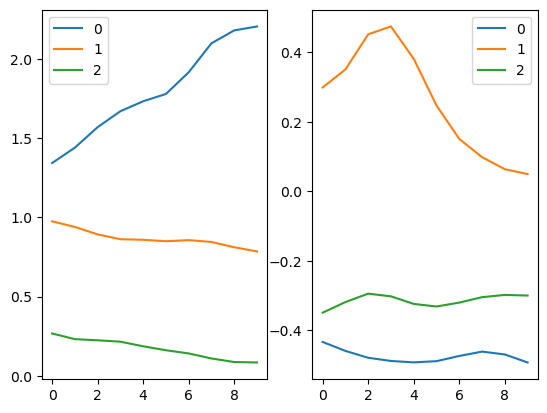

In [14]:
import glob

from sklearn import linear_model
from scipy.signal import hilbert
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
#stimulus_window = 70  #stimulus length for STA (stimulus trigger ensembles average)
roll_time = 5  #rolling time for probility estimation of the outcome
states_label=[0,1,2]
v_smooth_window=2
lp_f = 25
accuracy_list=[]
accuracy_list2=[]
accuracy_list4=[]
states_linear_output=[]
states_linear_output2=[]
states_linear_output4=[]
fig, axs = plt.subplots(1,2)
sta_all=[]
sta_vx_all=[]
shuffled_indicies = np.random.permutation(42991-0*16)
train_data_size = int((42991-0*16)* 3 / 4)
for stimulus_window in range(10,11,2):
    print(stimulus_window)
    prob_states_mul_lr=[]
    prob_states_lr = []
    prob_states_lr_2=[]
    prob_states_lr_4 = []
    v_x_all =[]
    v_y_all=[]
    for states in states_label:
        #initial_time = [569, 276, 99,184,1776,567,2435,226,1017]
        initial_time = [569, 276, 99,1776,  567, 2435,  141, 109, 204, 400, 377, 206, 170,177, 207, 169]

        videodirectory = 'B:/HsinYi/GitHub/sensory_beh/'
        videoname = '*'
        sensory_dic = videodirectory+'sensory_auto/'
        sensory_roi_files = glob.glob(sensory_dic+ videoname+ '_roi_coordinates_side.npz')
        sensory_stft_files = glob.glob(sensory_dic+ videoname+ '_roi_stft_side.npz')

        labeled_beh = []
        observations = []
        stimulus =[]
        stimulus_all=[]
        stimulus_fly=[]
        stimulus_v_x = []
        stimulus_v_y = []
        stimulus_fly_all=[]
        stimulus_v_x_all = []
        stimulus_v_y_all = []
        observations_fly = []
        for j in range(len(sensory_roi_files)):
            sensory_roi = np.load(sensory_roi_files[j])
            sensory_stft = np.load(sensory_stft_files[j])

            roi_fly_list = sensory_roi['roi_fly_list']
            roi_spider_list = sensory_roi['roi_spider_list']
            nframes = roi_fly_list.shape[0]
            ff_stft = sensory_stft['ff']
            f_spec_fly = sensory_stft['f_spec_fly']
            f_spec_fly_p = sensory_stft['f_spec_fly_p']
            f_spec_spider_p = sensory_stft['f_spec_spider_p']
            vid_name = sensory_roi_files[j].split('/sensory_auto\\')[1].split('_roi_coordinates_side.npz')[0]
            r = roi_spider_list[:, 1] + roi_spider_list[:, 3] / 2 - roi_fly_list[:, 1] - roi_fly_list[:, 3] / 2
            r = np.abs(r)
            r = r / ((roi_spider_list[:, 2]+roi_spider_list[:, 3]))/2
            #r = r / np.min(r)
            r = (1 / r) ** 2
            r = r / np.max(r)
            r[np.where(r<0.5)[0]]=0.5
            # r=r+0.5
            # r=r/np.max(r)
            x = roi_fly_list[:, 0] + roi_fly_list[:, 2] / 2
            v_x = x - np.roll(x, 1)
            v_x = v_x[1:len(v_x)]
            y = roi_fly_list[:, 1] + roi_fly_list[:, 3] / 2
            v_y = y - np.roll(y, 1)
            v_y = v_y[1:len(v_y)]
            v_x = hilbert(v_x)
            v_x = np.abs(v_x)
            v_y = hilbert(v_y)
            v_y = np.abs(v_y)

            ## Load beh
            # filenames = glob.glob(videodirectory+ 'wavelet/'+vid_name+ '*_croprotaligned01234_nonormalized_wavelet.npz')
            # csv_filenames = glob.glob(videodirectory+'merging_static/' + vid_name + '*_wavelet_timestep.csv')
            beh_hmm = np.load(
                glob.glob(videodirectory + 'sensory_auto/' + vid_name + '*_hmm_umap_filtered_predictedlabels.npy')[0]
                )

            ## Sensory
            test_divide = np.divide(f_spec_fly, f_spec_fly_p)
            # test_divide = np.mean(test_divide, axis=0)
            t = [i for i in range(int(40 / 2), (nframes - int(40 / 2)), 2)]
            # t= [i for i in range(4000, 6000, 10)]
            # if '0328' in sensory_roi_files[j]:
            #     t.append(5100)
            t = np.array(t)

            t3 = [i for i in range(0, initial_time[j], 1)]
            t3 = np.array(t3)
            yinterp3 = np.interp(t3, t, np.mean(test_divide[0:13, ], axis=0))
            yinterp3_mean = np.mean(yinterp3)
            yinterp3_std = np.std(yinterp3)
            yinterp3fly = np.interp(t3, t, np.mean(f_spec_fly[0:13, ], axis=0))
            yinterp3fly_mean = np.mean(yinterp3fly)
            yinterp3fly_std = np.std(yinterp3fly)
            yinterp3spider = np.interp(t3, t, np.mean(f_spec_spider_p[0:13, ], axis=0))
            yinterp3spider_mean = np.mean(yinterp3spider)
            yinterp3spider_std = np.std(yinterp3spider)

            t2 = [i for i in range(initial_time[j], (len(beh_hmm) + initial_time[j]), 1)]
            # # t= [i for i in range(4000, 6000, 10)]
            t2 = np.array(t2)
            #
            yinterp = np.interp(t2, t, np.mean(test_divide[0:13, ], axis=0))
            yinterp = (yinterp - yinterp3_mean) / yinterp3_std
            yinterpspider = np.interp(t2, t, np.mean(f_spec_spider_p[0:13, ], axis=0))
            #yinterpspider = (yinterpspider - yinterp3spider_mean) / yinterp3spider_std
            yinterpspider = yinterpspider / (np.max(yinterpspider))
            # yinterp = yinterp/(np.max(yinterp))
            # yinterp = interp1d(t,  test_divide, axis=1)
            # yinterp = yinterp(t2)
            yinterpfly = np.interp(t2, t, np.mean(f_spec_fly[0:13, :], axis=0))
            yinterpfly = (yinterpfly - yinterp3fly_mean) / yinterp3fly_std
            #yinterpfly = yinterpfly / (np.max(yinterpfly))
            #yinterpfly = yinterpfly - yinterpspider * r[t2]
            #yinterpfly = yinterpfly / np.max(yinterpfly)
            # if states ==0:
            #
            #     v_x_all.append(v_x[t2][0:len(v_x[t2])-stimulus_window])
            #     v_y_all.append(v_y[t2][0:len(v_y[t2])-stimulus_window])
            v_x_sensory = v_x[t2][0:len(v_x[t2])]
            v_y_sensory = v_y[t2][0:len(v_y[t2])]

            sos = signal.butter(10, lp_f, 'lp', fs=100, output='sos')
            v_x_sensory = signal.sosfilt(sos, v_x_sensory)
            v_y_sensory = signal.sosfilt(sos, v_y_sensory)

            v_x_sensory = (v_x_sensory  -np.mean(v_x_sensory )) / np.std(v_x_sensory)
            v_y_sensory = (v_y_sensory  -np.mean(v_y_sensory )) / np.std(v_y_sensory)

            # for v_time in range(len(v_x_sensory)):
            #     if v_time < int(v_smooth_window / 2):
            #         v_x_sensory[v_time] = np.max(v_x_sensory[0: int(v_smooth_window)])
            #         v_y_sensory[v_time] = np.max(v_y_sensory[0: int(v_smooth_window)])
            #     else:
            #         v_x_sensory[v_time] = np.max(
            #             v_x_sensory[v_time - int(v_smooth_window / 2): v_time + int(v_smooth_window / 2)])
            #         v_y_sensory[v_time] = np.max(
            #             v_y_sensory[v_time - int(v_smooth_window / 2): v_time + int(v_smooth_window / 2)])

            ## Spike trigger average
            from itertools import groupby
            count_dups = [sum(1 for _ in group) for _, group in groupby(beh_hmm)]
            cumsum = np.cumsum(count_dups)

            groups = []
            uniquekeys = []
            for k, g in groupby(beh_hmm):
                groups.append(list(g))  # Store group iterator as a list
                uniquekeys.append(k)

            idx = np.where(np.array(uniquekeys)==states)
            stimulus_temp=[]
            stimulus_temp_fly=[]

            stimulus_v_x_temp = []
            stimulus_v_y_temp = []

            for trigger in range(len(idx[0])):
                if idx[0][trigger]==0:
                    continue
                else:
                    event_time = cumsum[idx[0][trigger]-1]
                    if len(yinterp[event_time - stimulus_window:event_time])==0:
                        stimulus.append(yinterp[0:stimulus_window])
                        stimulus_fly.append(yinterpfly[0:stimulus_window])
                        stimulus_temp.append(yinterp[0:stimulus_window])
                        stimulus_temp_fly.append(yinterpfly[0:stimulus_window])
                        stimulus_v_x.append(v_x_sensory[0:stimulus_window])
                        stimulus_v_y.append(v_y_sensory[0:stimulus_window])
                        stimulus_v_x_temp.append(v_x_sensory[0:stimulus_window])
                        stimulus_v_y_temp.append(v_y_sensory[0:stimulus_window])
                    else:
                        stimulus.append(yinterp[event_time - stimulus_window:event_time])
                        stimulus_fly.append(yinterpfly[event_time - stimulus_window:event_time])
                        stimulus_temp.append(yinterp[event_time - stimulus_window:event_time])
                        stimulus_temp_fly.append(yinterpfly[event_time - stimulus_window:event_time])
                        stimulus_v_x.append(v_x_sensory[event_time - stimulus_window:event_time])
                        stimulus_v_y.append(v_y_sensory[event_time - stimulus_window:event_time])
                        stimulus_v_x_temp.append(v_x_sensory[event_time - stimulus_window:event_time])
                        stimulus_v_y_temp.append(v_y_sensory[event_time - stimulus_window:event_time])


            stimulus_all.append(stimulus_temp)
            stimulus_fly_all.append(stimulus_temp_fly)
            stimulus_v_x_all.append(stimulus_v_x_temp)
            stimulus_v_y_all.append(stimulus_v_y_temp)


            #beh_hmm= np.load(filenames[0].replace('.npz', '_hmm_umap_filtered_predictedlabels.npy'))
            #beh_manual= np.load(filenames[0].replace('.npz', '_manuallabels.npy'))




            labeled_beh.append(beh_hmm)
            observations.append(list(yinterp))
            observations_fly.append(list(yinterpfly))


        ## Spike trigger average of all videos. Mean centered
        stimulus_test = np.array(stimulus)
        data_ensembles_len = stimulus_test.shape[0]
        arr = np.arange(data_ensembles_len)
        np.random.shuffle(arr)
        #train_set = stimulus_test[arr[0:int(len(arr)*3/4)]]
        #test_set = stimulus_test[arr[int(len(arr)*3/4):len(arr)]]
        train_set = stimulus_test
        sta = np.mean(train_set, axis=0)
        #sta = sta-np.mean(sta)



        stimulus_test = np.array(stimulus_fly)
        data_ensembles_len = stimulus_test.shape[0]
        arr = np.arange(data_ensembles_len)
        np.random.shuffle(arr)
        # train_set = stimulus_test[arr[0:int(len(arr)*3/4)]]
        # test_set = stimulus_test[arr[int(len(arr)*3/4):len(arr)]]
        train_set = stimulus_test
        sta_fly = np.mean(train_set, axis=0)
        #sta_fly = sta_fly-np.mean(sta_fly)

        stimulus_test = np.array(stimulus_v_x)
        data_ensembles_len = stimulus_test.shape[0]
        arr = np.arange(data_ensembles_len)
        np.random.shuffle(arr)
        # train_set = stimulus_test[arr[0:int(len(arr)*3/4)]]
        # test_set = stimulus_test[arr[int(len(arr)*3/4):len(arr)]]
        train_set = stimulus_test
        sta_vx = np.mean(train_set, axis=0)

        stimulus_test = np.array(stimulus_v_y)
        data_ensembles_len = stimulus_test.shape[0]
        arr = np.arange(data_ensembles_len)
        np.random.shuffle(arr)
        # train_set = stimulus_test[arr[0:int(len(arr)*3/4)]]
        # test_set = stimulus_test[arr[int(len(arr)*3/4):len(arr)]]
        train_set = stimulus_test
        sta_vy = np.mean(train_set, axis=0)

        axs[0].plot(sta, label=str(states))
        sta_all.append(sta)
        axs[0].legend()
        # axs[1].plot(sta_fly, label='sta_fly'+str(states))
        # axs[1].legend()
        axs[1].plot(sta_vx, label=str(states))
        sta_vx_all.append(sta_vx)
        axs[1].legend()
        # axs[3].plot(sta_vy, label=str(states))
        # axs[3].legend()

### Static: 0
### Crouching: 1
### Shaking: 2



25


B:\TMP\ipykernel_16832\1538626485.py:70: RuntimeWarning: divide by zero encountered in divide
  r = (1 / r) ** 2
B:\TMP\ipykernel_16832\1538626485.py:71: RuntimeWarning: invalid value encountered in divide
  r = r / np.max(r)


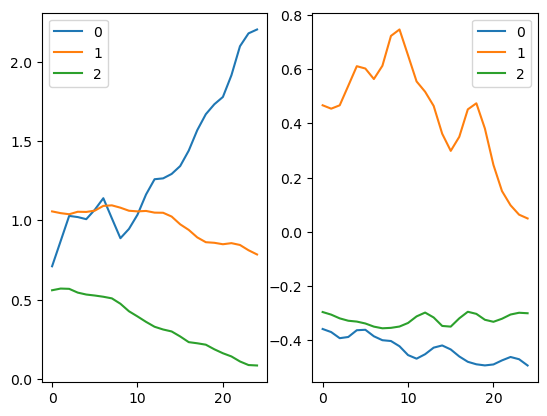

In [15]:
import glob

from sklearn import linear_model
from scipy.signal import hilbert
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
#stimulus_window = 70  #stimulus length for STA (stimulus trigger ensembles average)
roll_time = 5  #rolling time for probility estimation of the outcome
states_label=[0,1,2]
v_smooth_window=2
lp_f = 25
accuracy_list=[]
accuracy_list2=[]
accuracy_list4=[]
states_linear_output=[]
states_linear_output2=[]
states_linear_output4=[]
fig, axs = plt.subplots(1,2)
sta_all=[]
sta_vx_all=[]
shuffled_indicies = np.random.permutation(42991-15*16)
train_data_size = int((42991-15*16)* 3 / 4)
for stimulus_window in range(25,26,2):
    print(stimulus_window)
    prob_states_mul_lr=[]
    prob_states_lr = []
    prob_states_lr_2=[]
    prob_states_lr_4 = []
    v_x_all =[]
    v_y_all=[]
    for states in states_label:
        #initial_time = [569, 276, 99,184,1776,567,2435,226,1017]
        initial_time = [569, 276, 99,1776,  567, 2435,  141, 109, 204, 400, 377, 206, 170,177, 207, 169]

        videodirectory = 'B:/HsinYi/GitHub/sensory_beh/'
        videoname = '*'
        sensory_dic = videodirectory+'sensory_auto/'
        sensory_roi_files = glob.glob(sensory_dic+ videoname+ '_roi_coordinates_side.npz')
        sensory_stft_files = glob.glob(sensory_dic+ videoname+ '_roi_stft_side.npz')

        labeled_beh = []
        observations = []
        stimulus =[]
        stimulus_all=[]
        stimulus_fly=[]
        stimulus_v_x = []
        stimulus_v_y = []
        stimulus_fly_all=[]
        stimulus_v_x_all = []
        stimulus_v_y_all = []
        observations_fly = []
        for j in range(len(sensory_roi_files)):
            sensory_roi = np.load(sensory_roi_files[j])
            sensory_stft = np.load(sensory_stft_files[j])

            roi_fly_list = sensory_roi['roi_fly_list']
            roi_spider_list = sensory_roi['roi_spider_list']
            nframes = roi_fly_list.shape[0]
            ff_stft = sensory_stft['ff']
            f_spec_fly = sensory_stft['f_spec_fly']
            f_spec_fly_p = sensory_stft['f_spec_fly_p']
            f_spec_spider_p = sensory_stft['f_spec_spider_p']
            vid_name = sensory_roi_files[j].split('/sensory_auto\\')[1].split('_roi_coordinates_side.npz')[0]
            r = roi_spider_list[:, 1] + roi_spider_list[:, 3] / 2 - roi_fly_list[:, 1] - roi_fly_list[:, 3] / 2
            r = np.abs(r)
            r = r / ((roi_spider_list[:, 2]+roi_spider_list[:, 3]))/2
            #r = r / np.min(r)
            r = (1 / r) ** 2
            r = r / np.max(r)
            r[np.where(r<0.5)[0]]=0.5
            # r=r+0.5
            # r=r/np.max(r)
            x = roi_fly_list[:, 0] + roi_fly_list[:, 2] / 2
            v_x = x - np.roll(x, 1)
            v_x = v_x[1:len(v_x)]
            y = roi_fly_list[:, 1] + roi_fly_list[:, 3] / 2
            v_y = y - np.roll(y, 1)
            v_y = v_y[1:len(v_y)]
            v_x = hilbert(v_x)
            v_x = np.abs(v_x)
            v_y = hilbert(v_y)
            v_y = np.abs(v_y)

            ## Load beh
            # filenames = glob.glob(videodirectory+ 'wavelet/'+vid_name+ '*_croprotaligned01234_nonormalized_wavelet.npz')
            # csv_filenames = glob.glob(videodirectory+'merging_static/' + vid_name + '*_wavelet_timestep.csv')
            beh_hmm = np.load(
                glob.glob(videodirectory + 'sensory_auto/' + vid_name + '*_hmm_umap_filtered_predictedlabels.npy')[0]
                )

            ## Sensory
            test_divide = np.divide(f_spec_fly, f_spec_fly_p)
            # test_divide = np.mean(test_divide, axis=0)
            t = [i for i in range(int(40 / 2), (nframes - int(40 / 2)), 2)]
            # t= [i for i in range(4000, 6000, 10)]
            # if '0328' in sensory_roi_files[j]:
            #     t.append(5100)
            t = np.array(t)

            t3 = [i for i in range(0, initial_time[j], 1)]
            t3 = np.array(t3)
            yinterp3 = np.interp(t3, t, np.mean(test_divide[0:13, ], axis=0))
            yinterp3_mean = np.mean(yinterp3)
            yinterp3_std = np.std(yinterp3)
            yinterp3fly = np.interp(t3, t, np.mean(f_spec_fly[0:13, ], axis=0))
            yinterp3fly_mean = np.mean(yinterp3fly)
            yinterp3fly_std = np.std(yinterp3fly)
            yinterp3spider = np.interp(t3, t, np.mean(f_spec_spider_p[0:13, ], axis=0))
            yinterp3spider_mean = np.mean(yinterp3spider)
            yinterp3spider_std = np.std(yinterp3spider)

            t2 = [i for i in range(initial_time[j], (len(beh_hmm) + initial_time[j]), 1)]
            # # t= [i for i in range(4000, 6000, 10)]
            t2 = np.array(t2)
            #
            yinterp = np.interp(t2, t, np.mean(test_divide[0:13, ], axis=0))
            yinterp = (yinterp - yinterp3_mean) / yinterp3_std
            yinterpspider = np.interp(t2, t, np.mean(f_spec_spider_p[0:13, ], axis=0))
            #yinterpspider = (yinterpspider - yinterp3spider_mean) / yinterp3spider_std
            yinterpspider = yinterpspider / (np.max(yinterpspider))
            # yinterp = yinterp/(np.max(yinterp))
            # yinterp = interp1d(t,  test_divide, axis=1)
            # yinterp = yinterp(t2)
            yinterpfly = np.interp(t2, t, np.mean(f_spec_fly[0:13, :], axis=0))
            yinterpfly = (yinterpfly - yinterp3fly_mean) / yinterp3fly_std
            #yinterpfly = yinterpfly / (np.max(yinterpfly))
            #yinterpfly = yinterpfly - yinterpspider * r[t2]
            #yinterpfly = yinterpfly / np.max(yinterpfly)
            # if states ==0:
            #
            #     v_x_all.append(v_x[t2][0:len(v_x[t2])-stimulus_window])
            #     v_y_all.append(v_y[t2][0:len(v_y[t2])-stimulus_window])
            v_x_sensory = v_x[t2][0:len(v_x[t2])]
            v_y_sensory = v_y[t2][0:len(v_y[t2])]

            sos = signal.butter(10, lp_f, 'lp', fs=100, output='sos')
            v_x_sensory = signal.sosfilt(sos, v_x_sensory)
            v_y_sensory = signal.sosfilt(sos, v_y_sensory)

            v_x_sensory = (v_x_sensory  -np.mean(v_x_sensory )) / np.std(v_x_sensory)
            v_y_sensory = (v_y_sensory  -np.mean(v_y_sensory )) / np.std(v_y_sensory)

            # for v_time in range(len(v_x_sensory)):
            #     if v_time < int(v_smooth_window / 2):
            #         v_x_sensory[v_time] = np.max(v_x_sensory[0: int(v_smooth_window)])
            #         v_y_sensory[v_time] = np.max(v_y_sensory[0: int(v_smooth_window)])
            #     else:
            #         v_x_sensory[v_time] = np.max(
            #             v_x_sensory[v_time - int(v_smooth_window / 2): v_time + int(v_smooth_window / 2)])
            #         v_y_sensory[v_time] = np.max(
            #             v_y_sensory[v_time - int(v_smooth_window / 2): v_time + int(v_smooth_window / 2)])

            ## Spike trigger average
            from itertools import groupby
            count_dups = [sum(1 for _ in group) for _, group in groupby(beh_hmm)]
            cumsum = np.cumsum(count_dups)

            groups = []
            uniquekeys = []
            for k, g in groupby(beh_hmm):
                groups.append(list(g))  # Store group iterator as a list
                uniquekeys.append(k)

            idx = np.where(np.array(uniquekeys)==states)
            stimulus_temp=[]
            stimulus_temp_fly=[]

            stimulus_v_x_temp = []
            stimulus_v_y_temp = []

            for trigger in range(len(idx[0])):
                if idx[0][trigger]==0:
                    continue
                else:
                    event_time = cumsum[idx[0][trigger]-1]
                    if len(yinterp[event_time - stimulus_window:event_time])==0:
                        stimulus.append(yinterp[0:stimulus_window])
                        stimulus_fly.append(yinterpfly[0:stimulus_window])
                        stimulus_temp.append(yinterp[0:stimulus_window])
                        stimulus_temp_fly.append(yinterpfly[0:stimulus_window])
                        stimulus_v_x.append(v_x_sensory[0:stimulus_window])
                        stimulus_v_y.append(v_y_sensory[0:stimulus_window])
                        stimulus_v_x_temp.append(v_x_sensory[0:stimulus_window])
                        stimulus_v_y_temp.append(v_y_sensory[0:stimulus_window])
                    else:
                        stimulus.append(yinterp[event_time - stimulus_window:event_time])
                        stimulus_fly.append(yinterpfly[event_time - stimulus_window:event_time])
                        stimulus_temp.append(yinterp[event_time - stimulus_window:event_time])
                        stimulus_temp_fly.append(yinterpfly[event_time - stimulus_window:event_time])
                        stimulus_v_x.append(v_x_sensory[event_time - stimulus_window:event_time])
                        stimulus_v_y.append(v_y_sensory[event_time - stimulus_window:event_time])
                        stimulus_v_x_temp.append(v_x_sensory[event_time - stimulus_window:event_time])
                        stimulus_v_y_temp.append(v_y_sensory[event_time - stimulus_window:event_time])


            stimulus_all.append(stimulus_temp)
            stimulus_fly_all.append(stimulus_temp_fly)
            stimulus_v_x_all.append(stimulus_v_x_temp)
            stimulus_v_y_all.append(stimulus_v_y_temp)


            #beh_hmm= np.load(filenames[0].replace('.npz', '_hmm_umap_filtered_predictedlabels.npy'))
            #beh_manual= np.load(filenames[0].replace('.npz', '_manuallabels.npy'))




            labeled_beh.append(beh_hmm)
            observations.append(list(yinterp))
            observations_fly.append(list(yinterpfly))


        ## Spike trigger average of all videos. Mean centered
        stimulus_test = np.array(stimulus)
        data_ensembles_len = stimulus_test.shape[0]
        arr = np.arange(data_ensembles_len)
        np.random.shuffle(arr)
        #train_set = stimulus_test[arr[0:int(len(arr)*3/4)]]
        #test_set = stimulus_test[arr[int(len(arr)*3/4):len(arr)]]
        train_set = stimulus_test
        sta = np.mean(train_set, axis=0)
        #sta = sta-np.mean(sta)



        stimulus_test = np.array(stimulus_fly)
        data_ensembles_len = stimulus_test.shape[0]
        arr = np.arange(data_ensembles_len)
        np.random.shuffle(arr)
        # train_set = stimulus_test[arr[0:int(len(arr)*3/4)]]
        # test_set = stimulus_test[arr[int(len(arr)*3/4):len(arr)]]
        train_set = stimulus_test
        sta_fly = np.mean(train_set, axis=0)
        #sta_fly = sta_fly-np.mean(sta_fly)

        stimulus_test = np.array(stimulus_v_x)
        data_ensembles_len = stimulus_test.shape[0]
        arr = np.arange(data_ensembles_len)
        np.random.shuffle(arr)
        # train_set = stimulus_test[arr[0:int(len(arr)*3/4)]]
        # test_set = stimulus_test[arr[int(len(arr)*3/4):len(arr)]]
        train_set = stimulus_test
        sta_vx = np.mean(train_set, axis=0)

        stimulus_test = np.array(stimulus_v_y)
        data_ensembles_len = stimulus_test.shape[0]
        arr = np.arange(data_ensembles_len)
        np.random.shuffle(arr)
        # train_set = stimulus_test[arr[0:int(len(arr)*3/4)]]
        # test_set = stimulus_test[arr[int(len(arr)*3/4):len(arr)]]
        train_set = stimulus_test
        sta_vy = np.mean(train_set, axis=0)

        axs[0].plot(sta, label=str(states))
        sta_all.append(sta)
        axs[0].legend()
        # axs[1].plot(sta_fly, label='sta_fly'+str(states))
        # axs[1].legend()
        axs[1].plot(sta_vx, label=str(states))
        sta_vx_all.append(sta_vx)
        axs[1].legend()
        # axs[3].plot(sta_vy, label=str(states))
        # axs[3].legend()

### Static: 0
### Crouching: 1
### Shaking: 2



50


B:\TMP\ipykernel_16832\3408290904.py:70: RuntimeWarning: divide by zero encountered in divide
  r = (1 / r) ** 2
B:\TMP\ipykernel_16832\3408290904.py:71: RuntimeWarning: invalid value encountered in divide
  r = r / np.max(r)


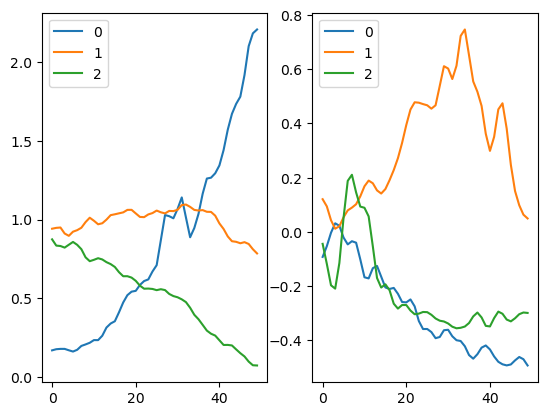

In [16]:
import glob

from sklearn import linear_model
from scipy.signal import hilbert
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
#stimulus_window = 70  #stimulus length for STA (stimulus trigger ensembles average)
roll_time = 5  #rolling time for probility estimation of the outcome
states_label=[0,1,2]
v_smooth_window=2
lp_f = 25
accuracy_list=[]
accuracy_list2=[]
accuracy_list4=[]
states_linear_output=[]
states_linear_output2=[]
states_linear_output4=[]
fig, axs = plt.subplots(1,2)
sta_all=[]
sta_vx_all=[]
shuffled_indicies = np.random.permutation(42991-40*16)
train_data_size = int((42991-40*16)* 3 / 4)
for stimulus_window in range(50,51,2):
    print(stimulus_window)
    prob_states_mul_lr=[]
    prob_states_lr = []
    prob_states_lr_2=[]
    prob_states_lr_4 = []
    v_x_all =[]
    v_y_all=[]
    for states in states_label:
        #initial_time = [569, 276, 99,184,1776,567,2435,226,1017]
        initial_time = [569, 276, 99,1776,  567, 2435,  141, 109, 204, 400, 377, 206, 170,177, 207, 169]

        videodirectory = 'B:/HsinYi/GitHub/sensory_beh/'
        videoname = '*'
        sensory_dic = videodirectory+'sensory_auto/'
        sensory_roi_files = glob.glob(sensory_dic+ videoname+ '_roi_coordinates_side.npz')
        sensory_stft_files = glob.glob(sensory_dic+ videoname+ '_roi_stft_side.npz')

        labeled_beh = []
        observations = []
        stimulus =[]
        stimulus_all=[]
        stimulus_fly=[]
        stimulus_v_x = []
        stimulus_v_y = []
        stimulus_fly_all=[]
        stimulus_v_x_all = []
        stimulus_v_y_all = []
        observations_fly = []
        for j in range(len(sensory_roi_files)):
            sensory_roi = np.load(sensory_roi_files[j])
            sensory_stft = np.load(sensory_stft_files[j])

            roi_fly_list = sensory_roi['roi_fly_list']
            roi_spider_list = sensory_roi['roi_spider_list']
            nframes = roi_fly_list.shape[0]
            ff_stft = sensory_stft['ff']
            f_spec_fly = sensory_stft['f_spec_fly']
            f_spec_fly_p = sensory_stft['f_spec_fly_p']
            f_spec_spider_p = sensory_stft['f_spec_spider_p']
            vid_name = sensory_roi_files[j].split('/sensory_auto\\')[1].split('_roi_coordinates_side.npz')[0]
            r = roi_spider_list[:, 1] + roi_spider_list[:, 3] / 2 - roi_fly_list[:, 1] - roi_fly_list[:, 3] / 2
            r = np.abs(r)
            r = r / ((roi_spider_list[:, 2]+roi_spider_list[:, 3]))/2
            #r = r / np.min(r)
            r = (1 / r) ** 2
            r = r / np.max(r)
            r[np.where(r<0.5)[0]]=0.5
            # r=r+0.5
            # r=r/np.max(r)
            x = roi_fly_list[:, 0] + roi_fly_list[:, 2] / 2
            v_x = x - np.roll(x, 1)
            v_x = v_x[1:len(v_x)]
            y = roi_fly_list[:, 1] + roi_fly_list[:, 3] / 2
            v_y = y - np.roll(y, 1)
            v_y = v_y[1:len(v_y)]
            v_x = hilbert(v_x)
            v_x = np.abs(v_x)
            v_y = hilbert(v_y)
            v_y = np.abs(v_y)

            ## Load beh
            # filenames = glob.glob(videodirectory+ 'wavelet/'+vid_name+ '*_croprotaligned01234_nonormalized_wavelet.npz')
            # csv_filenames = glob.glob(videodirectory+'merging_static/' + vid_name + '*_wavelet_timestep.csv')
            beh_hmm = np.load(
                glob.glob(videodirectory + 'sensory_auto/' + vid_name + '*_hmm_umap_filtered_predictedlabels.npy')[0]
                )

            ## Sensory
            test_divide = np.divide(f_spec_fly, f_spec_fly_p)
            # test_divide = np.mean(test_divide, axis=0)
            t = [i for i in range(int(40 / 2), (nframes - int(40 / 2)), 2)]
            # t= [i for i in range(4000, 6000, 10)]
            # if '0328' in sensory_roi_files[j]:
            #     t.append(5100)
            t = np.array(t)

            t3 = [i for i in range(0, initial_time[j], 1)]
            t3 = np.array(t3)
            yinterp3 = np.interp(t3, t, np.mean(test_divide[0:13, ], axis=0))
            yinterp3_mean = np.mean(yinterp3)
            yinterp3_std = np.std(yinterp3)
            yinterp3fly = np.interp(t3, t, np.mean(f_spec_fly[0:13, ], axis=0))
            yinterp3fly_mean = np.mean(yinterp3fly)
            yinterp3fly_std = np.std(yinterp3fly)
            yinterp3spider = np.interp(t3, t, np.mean(f_spec_spider_p[0:13, ], axis=0))
            yinterp3spider_mean = np.mean(yinterp3spider)
            yinterp3spider_std = np.std(yinterp3spider)

            t2 = [i for i in range(initial_time[j], (len(beh_hmm) + initial_time[j]), 1)]
            # # t= [i for i in range(4000, 6000, 10)]
            t2 = np.array(t2)
            #
            yinterp = np.interp(t2, t, np.mean(test_divide[0:13, ], axis=0))
            yinterp = (yinterp - yinterp3_mean) / yinterp3_std
            yinterpspider = np.interp(t2, t, np.mean(f_spec_spider_p[0:13, ], axis=0))
            #yinterpspider = (yinterpspider - yinterp3spider_mean) / yinterp3spider_std
            yinterpspider = yinterpspider / (np.max(yinterpspider))
            # yinterp = yinterp/(np.max(yinterp))
            # yinterp = interp1d(t,  test_divide, axis=1)
            # yinterp = yinterp(t2)
            yinterpfly = np.interp(t2, t, np.mean(f_spec_fly[0:13, :], axis=0))
            yinterpfly = (yinterpfly - yinterp3fly_mean) / yinterp3fly_std
            #yinterpfly = yinterpfly / (np.max(yinterpfly))
            #yinterpfly = yinterpfly - yinterpspider * r[t2]
            #yinterpfly = yinterpfly / np.max(yinterpfly)
            # if states ==0:
            #
            #     v_x_all.append(v_x[t2][0:len(v_x[t2])-stimulus_window])
            #     v_y_all.append(v_y[t2][0:len(v_y[t2])-stimulus_window])
            v_x_sensory = v_x[t2][0:len(v_x[t2])]
            v_y_sensory = v_y[t2][0:len(v_y[t2])]

            sos = signal.butter(10, lp_f, 'lp', fs=100, output='sos')
            v_x_sensory = signal.sosfilt(sos, v_x_sensory)
            v_y_sensory = signal.sosfilt(sos, v_y_sensory)

            v_x_sensory = (v_x_sensory  -np.mean(v_x_sensory )) / np.std(v_x_sensory)
            v_y_sensory = (v_y_sensory  -np.mean(v_y_sensory )) / np.std(v_y_sensory)

            # for v_time in range(len(v_x_sensory)):
            #     if v_time < int(v_smooth_window / 2):
            #         v_x_sensory[v_time] = np.max(v_x_sensory[0: int(v_smooth_window)])
            #         v_y_sensory[v_time] = np.max(v_y_sensory[0: int(v_smooth_window)])
            #     else:
            #         v_x_sensory[v_time] = np.max(
            #             v_x_sensory[v_time - int(v_smooth_window / 2): v_time + int(v_smooth_window / 2)])
            #         v_y_sensory[v_time] = np.max(
            #             v_y_sensory[v_time - int(v_smooth_window / 2): v_time + int(v_smooth_window / 2)])

            ## Spike trigger average
            from itertools import groupby
            count_dups = [sum(1 for _ in group) for _, group in groupby(beh_hmm)]
            cumsum = np.cumsum(count_dups)

            groups = []
            uniquekeys = []
            for k, g in groupby(beh_hmm):
                groups.append(list(g))  # Store group iterator as a list
                uniquekeys.append(k)

            idx = np.where(np.array(uniquekeys)==states)
            stimulus_temp=[]
            stimulus_temp_fly=[]

            stimulus_v_x_temp = []
            stimulus_v_y_temp = []

            for trigger in range(len(idx[0])):
                if idx[0][trigger]==0:
                    continue
                else:
                    event_time = cumsum[idx[0][trigger]-1]
                    if len(yinterp[event_time - stimulus_window:event_time])==0:
                        stimulus.append(yinterp[0:stimulus_window])
                        stimulus_fly.append(yinterpfly[0:stimulus_window])
                        stimulus_temp.append(yinterp[0:stimulus_window])
                        stimulus_temp_fly.append(yinterpfly[0:stimulus_window])
                        stimulus_v_x.append(v_x_sensory[0:stimulus_window])
                        stimulus_v_y.append(v_y_sensory[0:stimulus_window])
                        stimulus_v_x_temp.append(v_x_sensory[0:stimulus_window])
                        stimulus_v_y_temp.append(v_y_sensory[0:stimulus_window])
                    else:
                        stimulus.append(yinterp[event_time - stimulus_window:event_time])
                        stimulus_fly.append(yinterpfly[event_time - stimulus_window:event_time])
                        stimulus_temp.append(yinterp[event_time - stimulus_window:event_time])
                        stimulus_temp_fly.append(yinterpfly[event_time - stimulus_window:event_time])
                        stimulus_v_x.append(v_x_sensory[event_time - stimulus_window:event_time])
                        stimulus_v_y.append(v_y_sensory[event_time - stimulus_window:event_time])
                        stimulus_v_x_temp.append(v_x_sensory[event_time - stimulus_window:event_time])
                        stimulus_v_y_temp.append(v_y_sensory[event_time - stimulus_window:event_time])


            stimulus_all.append(stimulus_temp)
            stimulus_fly_all.append(stimulus_temp_fly)
            stimulus_v_x_all.append(stimulus_v_x_temp)
            stimulus_v_y_all.append(stimulus_v_y_temp)


            #beh_hmm= np.load(filenames[0].replace('.npz', '_hmm_umap_filtered_predictedlabels.npy'))
            #beh_manual= np.load(filenames[0].replace('.npz', '_manuallabels.npy'))




            labeled_beh.append(beh_hmm)
            observations.append(list(yinterp))
            observations_fly.append(list(yinterpfly))


        ## Spike trigger average of all videos. Mean centered
        stimulus_test = np.array(stimulus)
        data_ensembles_len = stimulus_test.shape[0]
        arr = np.arange(data_ensembles_len)
        np.random.shuffle(arr)
        #train_set = stimulus_test[arr[0:int(len(arr)*3/4)]]
        #test_set = stimulus_test[arr[int(len(arr)*3/4):len(arr)]]
        train_set = stimulus_test
        sta = np.mean(train_set, axis=0)
        #sta = sta-np.mean(sta)



        stimulus_test = np.array(stimulus_fly)
        data_ensembles_len = stimulus_test.shape[0]
        arr = np.arange(data_ensembles_len)
        np.random.shuffle(arr)
        # train_set = stimulus_test[arr[0:int(len(arr)*3/4)]]
        # test_set = stimulus_test[arr[int(len(arr)*3/4):len(arr)]]
        train_set = stimulus_test
        sta_fly = np.mean(train_set, axis=0)
        #sta_fly = sta_fly-np.mean(sta_fly)

        stimulus_test = np.array(stimulus_v_x)
        data_ensembles_len = stimulus_test.shape[0]
        arr = np.arange(data_ensembles_len)
        np.random.shuffle(arr)
        # train_set = stimulus_test[arr[0:int(len(arr)*3/4)]]
        # test_set = stimulus_test[arr[int(len(arr)*3/4):len(arr)]]
        train_set = stimulus_test
        sta_vx = np.mean(train_set, axis=0)

        stimulus_test = np.array(stimulus_v_y)
        data_ensembles_len = stimulus_test.shape[0]
        arr = np.arange(data_ensembles_len)
        np.random.shuffle(arr)
        # train_set = stimulus_test[arr[0:int(len(arr)*3/4)]]
        # test_set = stimulus_test[arr[int(len(arr)*3/4):len(arr)]]
        train_set = stimulus_test
        sta_vy = np.mean(train_set, axis=0)

        axs[0].plot(sta, label=str(states))
        sta_all.append(sta)
        axs[0].legend()
        # axs[1].plot(sta_fly, label='sta_fly'+str(states))
        # axs[1].legend()
        axs[1].plot(sta_vx, label=str(states))
        sta_vx_all.append(sta_vx)
        axs[1].legend()
        # axs[3].plot(sta_vy, label=str(states))
        # axs[3].legend()

### Static: 0
### Crouching: 1
### Shaking: 2

